In [1]:
%pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install langchain-google-genai

  Using cached protobuf-6.31.1-cp310-abi3-win_amd64.whl.metadata (593 bytes)
Using cached protobuf-6.31.1-cp310-abi3-win_amd64.whl (435 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-proto 1.34.1 requires protobuf<6.0,>=5.0, but you have protobuf 6.31.1 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install langchain-community pypdf

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install langchain-groq langchain_core

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install langsmith


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install --quiet --upgrade langchain-openai

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install langchain-chroma

  Using cached protobuf-5.29.5-cp310-abi3-win_amd64.whl.metadata (592 bytes)
Using cached protobuf-5.29.5-cp310-abi3-win_amd64.whl (434 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.73.0 requires protobuf<7.0.0,>=6.30.0, but you have protobuf 5.29.5 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from dotenv import load_dotenv
load_dotenv(override=True)

import os
os.environ["LANGSMITH_TRACING"] = "true"

# Correct import
from langchain.callbacks.tracers import LangChainTracer
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

tracer = LangChainTracer()  # ✅ Correct tracer

Component integration

In [9]:
#LLM COMPONENT
import getpass
import os

if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("llama3-8b-8192", model_provider="groq")

In [10]:
#Embedding model
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [11]:
# Vector Store
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

Importing pdf into the program

In [12]:
%pip install -qU pypdf

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
file_path="nke-10k-2023.pdf"

In [14]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(file_path)
loader = PyPDFLoader(file_path)

docs = loader.load()

print(len(docs))

107


In [16]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200, add_start_index=True
)
all_splits = text_splitter.split_documents(docs)

len(all_splits)

516

In [17]:
#Creating embeddings for the documents
vector_1 = embeddings.embed_query(all_splits[0].page_content)
vector_2 = embeddings.embed_query(all_splits[1].page_content)

assert len(vector_1) == len(vector_2)
print(f"Generated vectors of length {len(vector_1)}\n")
print(vector_1[:10])

Generated vectors of length 768

[0.003303560661152005, -0.01885664090514183, -0.023528870195150375, 0.013265608809888363, 0.04694835841655731, 0.04489297419786453, 0.030707117170095444, 0.017642803490161896, 0.0011852466268464923, 0.028473228216171265]


In [18]:
ids = vector_store.add_documents(documents=all_splits)

In [21]:
type(ids)

list

In [26]:
print(ids[:10])

['2089d11b-f0aa-46dd-bf50-708a0a4d505a', '9e4e7ce0-6c2e-4d8e-a986-ff459b65e95a', '03bb4eb6-60c4-468a-84a2-e0aeeb8dc904', 'ca6e8cd3-e4fe-43e3-ae97-e29a214e04ee', '8118b2a3-18d9-4046-a3aa-11be2fdcaccd', '5c161fbb-f591-481a-982d-ee882e26f1b5', 'edab8419-4862-4c01-8f85-6ced13bfdec3', '4e46fa21-015d-44e9-826f-838f4381c414', '77d22850-b463-4741-85cf-73fb7ee3aca0', '3bd24dba-e2dd-43b8-a4a4-3e159bc83514']


In [19]:
results = vector_store.similarity_search(
    "How many distribution centers does Nike have in the US?"
)

print(results[0])

page_content='operations. We also lease an office complex in Shanghai, China, our headquarters for our Greater China geography, occupied by employees focused on implementing our
wholesale, NIKE Direct and merchandising strategies in the region, among other functions.
In the United States, NIKE has eight significant distribution centers. Five are located in or near Memphis, Tennessee, two of which are owned and three of which are
leased. Two other distribution centers, one located in Indianapolis, Indiana and one located in Dayton, Tennessee, are leased and operated by third-party logistics
providers. One distribution center for Converse is located in Ontario, California, which is leased. NIKE has a number of distribution facilities outside the United States,
some of which are leased and operated by third-party logistics providers. The most significant distribution facilities outside the United States are located in Laakdal,' metadata={'source': 'nke-10k-2023.pdf', 'creationdate': '2023

In [20]:
# Note that providers implement different scores; the score here
# is a distance metric that varies inversely with similarity.

results = vector_store.similarity_search_with_score("What was Nike's revenue in 2023?")
doc, score = results[0]
print(f"Score: {score}\n")
print(doc)

Score: 0.4402197301387787

page_content='Table of Contents
FISCAL 2023 NIKE BRAND REVENUE HIGHLIGHTSThe following tables present NIKE Brand revenues disaggregated by reportable operating segment, distribution channel and major product line:
FISCAL 2023 COMPARED TO FISCAL 2022
• NIKE, Inc. Revenues were $51.2 billion in fiscal 2023, which increased 10% and 16% compared to fiscal 2022 on a reported and currency-neutral basis, respectively.
The increase was due to higher revenues in North America, Europe, Middle East & Africa ("EMEA"), APLA and Greater China, which contributed approximately 7, 6,
2 and 1 percentage points to NIKE, Inc. Revenues, respectively.
• NIKE Brand revenues, which represented over 90% of NIKE, Inc. Revenues, increased 10% and 16% on a reported and currency-neutral basis, respectively. This
increase was primarily due to higher revenues in Men's, the Jordan Brand, Women's and Kids' which grew 17%, 35%,11% and 10%, respectively, on a wholesale
equivalent basis.' metad

Now starts the retrival part

In [27]:
from langchain import hub

# N.B. for non-US LangSmith endpoints, you may need to specify
# api_url="https://api.smith.langchain.com" in hub.pull.
prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


In [28]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [29]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

In [30]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

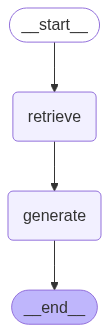

In [31]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [36]:
result = graph.invoke({"question": "return me a json file with metadata of the document"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='dd14e8b9-ac32-47c1-85a3-58ebfa1ab889', metadata={'creator': 'EDGAR Filing HTML Converter', 'source': 'nke-10k-2023.pdf', 'page': 97, 'moddate': '2023-07-20T16:22:08-04:00', 'total_pages': 107, 'page_label': '98', 'author': 'EDGAR Online, a division of Donnelley Financial Solutions', 'subject': 'Form 10-K filed on 2023-07-20 for the period ending 2023-05-31', 'start_index': 0, 'producer': 'EDGRpdf Service w/ EO.Pdf 22.0.40.0', 'keywords': '0000320187-23-000039; ; 10-K', 'title': '0000320187-23-000039', 'creationdate': '2023-07-20T16:22:00-04:00'}, page_content='Table of Contents\n101.INS Inline XBRL Instance Document - the instance document does not appear in the Interactive Data File because its XBRL tags are embedded within theInline XBRL document.\n101.SCH Inline XBRL Taxonomy Extension Schema\n101.CAL Inline XBRL Taxonomy Extension Calculation Linkbase\n101.DEF Inline XBRL Taxonomy Extension Definition Document\n101.LAB Inline XBRL Taxonomy Extension Label Lin